In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt


In [6]:
X, y = datasets.make_blobs (n_samples=150,n_features=2,centers=2, cluster_std=1.05, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 123) 

In [8]:
X[:5], y[:5]

(array([[ -0.53278301,  -1.64847081],
        [ -0.55022637, -11.61661524],
        [  1.38862276,  -1.4358059 ],
        [  1.37033956,  -0.64022071],
        [ -0.88060639,  -9.7094674 ]]),
 array([1, 0, 1, 1, 0]))

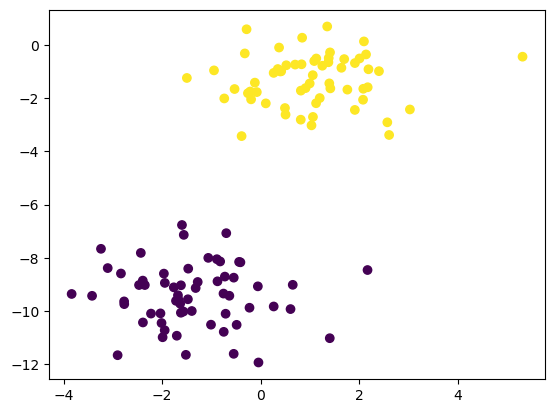

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(X_train [:, 0], X_train [:, 1], marker='o',c=y_train)

In [27]:

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):   # Use uppercase X here
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

                
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted
        
    def _unit_step_func(self, x):
        return np.where (x>=0, 1, 0)

In [15]:
def accuracy (y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy


In [29]:
p = Perceptron(learning_rate=0.01, n_iters=1000)
p


In [30]:
p.fit(X_train, y_train)
predictions = p.predict(X_test)
print("Perceptron classification accuracy", accuracy(y_test, predictions))


Perceptron classification accuracy 1.0


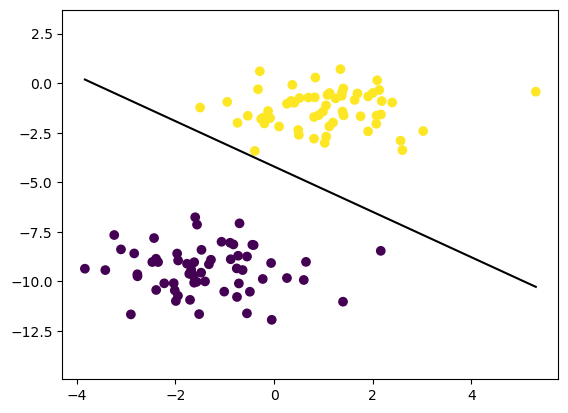

In [33]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Plot training points
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train)

# Compute the line endpoints
x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

# Plot decision boundary
ax.plot([x0_1, x0_2], [x1_1, x1_2], 'k')

# Adjust limits for better view
ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.show()
